In [11]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load test dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

print("Training data size:", len(trainset))
print("Testing data size:", len(testset))

# # Convert first image to NumPy array
# image, label = trainset[0]
# image_array = (image.numpy() > 0.5).astype(np.uint8)  # Convert to binary 0-1

input_dataset = []
for i in range(len(trainset)):
    image,label = trainset[i]
    image_array = (image.numpy() > 0.5).astype(np.uint8)
    input_dataset.append(image_array)
    
print(len(input_dataset))
print(input_dataset[324])

Training data size: 60000
Testing data size: 10000
60000
[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 

EmbeddingType: pencorr_6
16
[[0 0]
 [1 1]]
vectorb:  [-1.0, 0.41421353816986084, 0.41421353816986084, 1.000000238418579, 0.41421353816986084, 1.1920928955078125e-07, 1.1920928955078125e-07, 0.632993221282959, 0.41421353816986084, 1.1920928955078125e-07, 1.1920928955078125e-07, 0.632993221282959, 1.000000238418579, 0.632993221282959, 0.632993221282959, 0.41421353816986084]


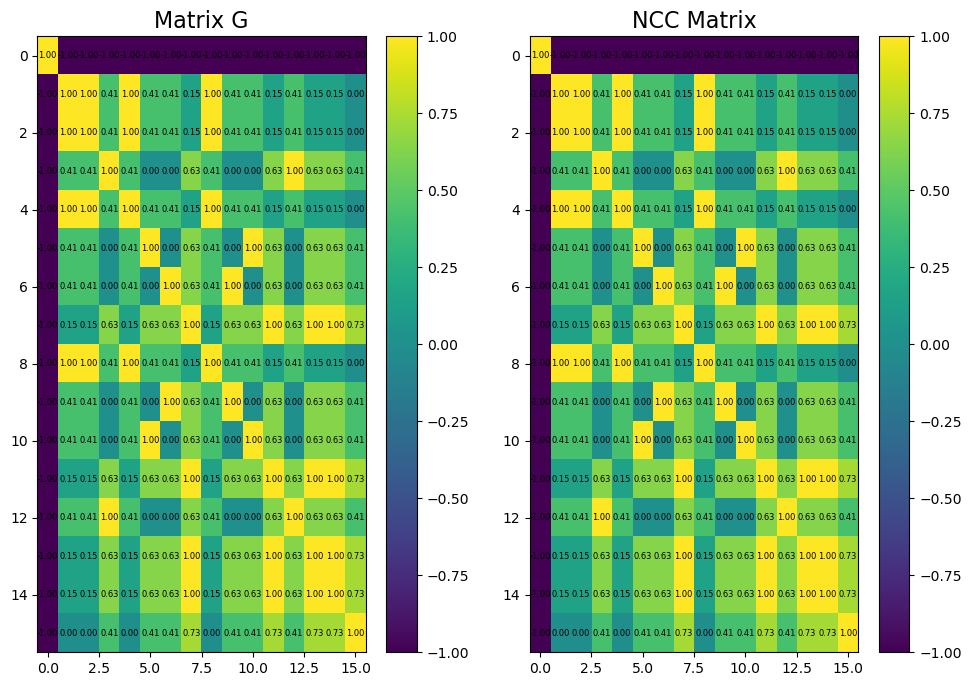

In [29]:
import matplotlib.pyplot as plt
from line_profiler import profile
import numpy as np
import src.data_processing.BruteForceEstimator as bfEstimator
import src.visualization.BFmethod as graphing
import src.visualization.Metrics as metrics
import src.data_processing.ImageProducts as ImageProducts

# -----Possible options-----
IMAGE_TYPES = ["NbinMmax_ones", "Nbin", "triangle", "triangle_mean_subtracted"]

IMAGE_FILTERS = ["unique", "Nmax_ones", "one_island"]

IMAGE_PRODUCT_TYPES = ["ncc", "ncc_scaled"]

EMBEDDING_TYPES = ["pencorr_D"]

# -----Variables-----
imageType = "2bin"
filters = ["100max_ones"]
imageProductType = "ncc_scaled_-1"
overwrite = {"imgSet": False, "imgProd": False, "embedding": False}
weight = None
dimensions = 6
k=2
# -----Execution-----

embeddingType = f"pencorr_{dimensions}"
print(f"EmbeddingType: {embeddingType}")

bruteForceEstimator = bfEstimator.BruteForceEstimator(
    imageType=imageType, filters=filters, imageProductType=imageProductType, embeddingType=embeddingType, overwrite=overwrite)

matrixG = bruteForceEstimator.matrixG
matrixA = bruteForceEstimator.matrixA

if matrixG.ndim == 1:
    matrixG = matrixG.reshape(-1, 1)
if matrixA.ndim == 1:
    matrixA = matrixA.reshape(-1, 1)

# Matrix G plot
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.imshow(matrixG, cmap='viridis', aspect='auto')
plt.title(f"Matrix G", fontsize=16)
plt.colorbar()
for (row, col), val in np.ndenumerate(matrixG):
    color = 'black'
    plt.text(col, row, f"{val:.2f}", ha='center', va='center', fontsize=6, color=color)

import torch

def compute_ncc(image1, image2):
    # Ensure inputs are PyTorch tensors
    if not isinstance(image1, torch.Tensor):
        image1 = torch.tensor(image1, dtype=torch.float32)
    if not isinstance(image2, torch.Tensor):
        image2 = torch.tensor(image2, dtype=torch.float32)

    # Flatten in case of multi-dimensional images (e.g., (H, W) or (C, H, W))
    image1 = image1.flatten()
    image2 = image2.flatten()

    # Normalize inputs by subtracting the mean
    image1 = image1 - torch.mean(image1)
    image2 = image2 - torch.mean(image2)

    # Compute numerator and denominator
    numerator = torch.sum(image1 * image2)
    denominator = torch.sqrt(torch.sum(image1 ** 2)) * torch.sqrt(torch.sum(image2 ** 2))

    # Ensure numerical stability
    ncc_value = numerator / (denominator + 1e-8)

    # Clamp result to the expected range [-1, 1] to handle edge cases
    return torch.clamp(ncc_value, -1, 1)

ncc_matrix = torch.zeros((16, 16))

input_dataset = []
print(len(bruteForceEstimator.imageSet))
for i in range(len(bruteForceEstimator.imageSet)):
    img = np.array(bruteForceEstimator.imageSet[i], dtype=np.float64)
    img = torch.from_numpy(img)
    img = img.cuda().double()
    input_dataset.append(img)

for i in range(16):
    for j in range(16):
        scale = ImageProducts.scale_min(ImageProducts.ncc, -1)
        NCC_scaled_value = scale(input_dataset[i].cpu(),input_dataset[j].cpu())
        ncc_matrix[i,j] = NCC_scaled_value

index = 3
vectorb = []
for i in range(len(bruteForceEstimator.imageSet)):
        scale = ImageProducts.scale_min(ImageProducts.ncc, -1)
        NCC_scaled_value = scale(bruteForceEstimator.imageSet[index],bruteForceEstimator.imageSet[i])
        vectorb.append(NCC_scaled_value)    

print(bruteForceEstimator.imageSet[index])

print("vectorb: ",vectorb)
# Dot Product Matrix plot
plt.subplot(1, 3, 2)
plt.imshow(ncc_matrix, cmap='viridis', aspect='auto')
plt.title(f"NCC Matrix", fontsize=16)
plt.colorbar()
for (row, col), val in np.ndenumerate(ncc_matrix):
    color = 'black'
    plt.text(col, row, f"{val:.2f}", ha='center', va='center', fontsize=6, color=color)

plt.show()